# Data Cleaning for YOLO v3

## Mounting the Google Drive

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Cleaning the CSV

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [0]:
df = pd.read_csv(r'/content/drive/My Drive/VAUV Dataset/json_csv/data_cleaned_2018_1.csv')
image_dir = r'/content/drive/My Drive/VAUV Dataset/Clipped Images/2018_VID_1_3'

In [0]:
df.head(2)

,Unnamed: 0,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,External ID,Agreement,Benchmark Agreement,Benchmark ID,Benchmark Reference ID,Dataset Name,Reviews,View Label,x1,y1,x2,y2,x3,y3,x4,y4
0,0,ck3rirb15emsq0a479nj01evq,ck3q479c42k1a0gmv6gm9dnhn,https://storage.labelbox.com/ck3oia7k4o22t0804...,"{""objects"":[{""featureId"":""ck3riqsfz0zc30y8riq2...",harshablast@gmail.com,VAUV 2018,1575477723000,1575477723000,6.305,2018_VID_1_3_frame854.jpg,NaN,NaN,NaN,NaN,VID_2018_p1,[],https://editor.labelbox.com?project=ck3oibg3ih...,290.056,636.872,247.151,190.391,0.000,0.000,0.000,0.000
1,1,ck3risionulfl0804x8vo2ow9,ck3q479ai2ijy0gmvett5dz12,https://storage.labelbox.com/ck3oia7k4o22t0804...,"{""objects"":[{""featureId"":""ck3rirc8a12tc0yd4oto...",okeaditya315@gmail.com,VAUV 2018,1575477779000,1575477779000,38.845,2018_VID_1_3_frame373.jpg,NaN,NaN,NaN,NaN,VID_2018_p1,[],https://editor.labelbox.com?project=ck3oibg3ih...,333.714,469.714,331.429,130.286,650.286,149.714,633.143,454.857


In [0]:
def get_max_min(df):
    ''' Note that this works only for the cases where we have all four cordinates'''
    df['x_min'] = -1.
    df['y_min'] = -1.
    df['x_max'] = -1.
    df['y_max'] = -1.

    for i in range(len(df)):
        df['x_min'][i] = min(df['x1'][i], df['x2'][i], df['x3'][i], df['x4'][i]).astype('float32')
        df['x_max'][i] = max(df['x1'][i], df['x2'][i], df['x3'][i], df['x4'][i]).astype('float32')

        df['y_min'][i] = min(df['y1'][i], df['y2'][i], df['y3'][i], df['y4'][i]).astype('float32')
        df['y_max'][i] = max(df['y1'][i], df['y2'][i], df['y3'][i], df['y4'][i]).astype('float32')

    return df


In [0]:
def fill_class_id(df):
    df['class_id'] = 1
    return(df)

In [0]:
def check_dims(df):
    for i in ['1', '2', '3', '4']:
        print(np.max(df[f'x{i}']), end=' ')
        print(np.max(df[f'y{i}']), end=' ')
        print()

In [0]:
check_dims(df)

1272.849 720.0 
1279.553 525.587 
1280.0 307.039 
1271.508 720.0 


In [0]:
def show_points(img_path, ):
    # img = cv2.imread(img_path)
    # img = cv2.circle(img, (int(df['x1']), int(df['y1'])), 2, (0,0,255), 8)
    # plt.imshow(img[...,::-1])

    # need to work with this

In [0]:
def resize_column(df, column_list, img_shape=(720, 1280), resize_shape=(416, 416)):

    #  Need to work on this. Naive division does not work.
    x_div = img_shape[0]
    y_div = img_shape[1]

    x_mul = resize_shape[0]
    y_mul = resize_shape[1]

    for cl in column_list:
        if(cl[0] == 'x'):
            new_column = cl + '_resized'
            df[new_column] = 1.
            
            for i, val in enumerate(df[cl]):
                val = (val / x_div) * x_mul
                df[new_column][i] = val

        elif(cl[0] == 'y'):
            new_column = cl + '_resized'
            df[new_column] = 1.
            for i, val in enumerate(df[cl]):
                val = (val / y_div) * y_mul
                df[new_column][i] = val

    return df    

In [0]:
df = get_max_min(df)

In [0]:
df = fill_class_id(df)

In [0]:
column_resized = ['x1', 'x2', 'x3', 'x4', 'y1', 'y1', 'y3', 'y4', 'x_min', 'x_max', 'y_min', 'y_max']
df = resize_column(df, column_resized)

In [0]:
df.head(3)

,Unnamed: 0,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,External ID,Agreement,Benchmark Agreement,Benchmark ID,Benchmark Reference ID,Dataset Name,Reviews,View Label,x1,y1,x2,y2,x3,y3,x4,y4,x_min,y_min,x_max,y_max,class_id
0,0,ck3rirb15emsq0a479nj01evq,ck3q479c42k1a0gmv6gm9dnhn,https://storage.labelbox.com/ck3oia7k4o22t0804...,"{""objects"":[{""featureId"":""ck3riqsfz0zc30y8riq2...",harshablast@gmail.com,VAUV 2018,1575477723000,1575477723000,6.305,2018_VID_1_3_frame854.jpg,NaN,NaN,NaN,NaN,VID_2018_p1,[],https://editor.labelbox.com?project=ck3oibg3ih...,290.056,636.872,247.151,190.391,0.000,0.000,0.000,0.000,0.000000,0.000000,290.056000,636.872009,1
1,1,ck3risionulfl0804x8vo2ow9,ck3q479ai2ijy0gmvett5dz12,https://storage.labelbox.com/ck3oia7k4o22t0804...,"{""objects"":[{""featureId"":""ck3rirc8a12tc0yd4oto...",okeaditya315@gmail.com,VAUV 2018,1575477779000,1575477779000,38.845,2018_VID_1_3_frame373.jpg,NaN,NaN,NaN,NaN,VID_2018_p1,[],https://editor.labelbox.com?project=ck3oibg3ih...,333.714,469.714,331.429,130.286,650.286,149.714,633.143,454.857,331.428986,130.285995,650.286011,469.713989,1
2,2,ck3risiw1ulg10804g719lwtq,ck3q479982hri0gmvfdzphqsq,https://storage.labelbox.com/ck3oia7k4o22t0804...,"{""objects"":[{""featureId"":""ck3rirrrl000g0yah9o5...",harshablast@gmail.com,VAUV 2018,1575477780000,1575477780000,33.092,2018_VID_1_3_frame116.jpg,NaN,NaN,NaN,NaN,VID_2018_p1,[],https://editor.labelbox.com?project=ck3oibg3ih...,733.779,716.998,803.659,39.890,1220.526,184.468,1109.683,704.950,733.778992,39.889999,1220.526001,716.997986,1


# Testing an Image with cordinates

Originally

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame325.jpg')
print(img.shape)

(720, 1280, 3)


In [0]:
img = cv2.circle(img, (293, 427), 5, (0,0,255), 8)

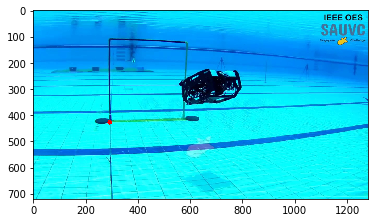

In [0]:
plt.imshow(img[...,::-1])

In [0]:
img = cv2.circle(img, (290, 106), 5, (0,0,255), 8)

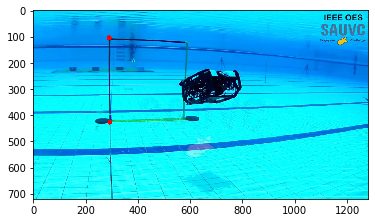

In [0]:
plt.imshow(img[...,::-1])

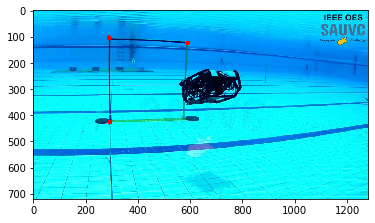

In [0]:
img = cv2.circle(img, (590,	125), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

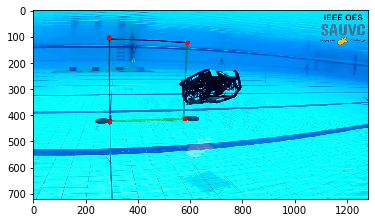

In [0]:
img = cv2.circle(img, (581, 414), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

After resizing

(720, 1280, 3)


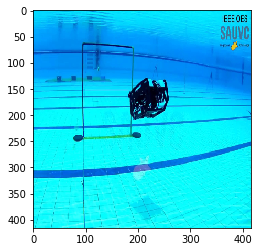

(416, 416, 3)


In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame325.jpg')
print(img.shape)
img = cv2.resize(img, (416, 416))
plt.imshow(img[...,::-1])
plt.show()
print(img.shape)

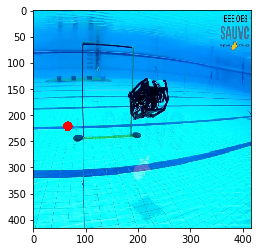

In [0]:
# After naive division
img = cv2.circle(img, (66, 221), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

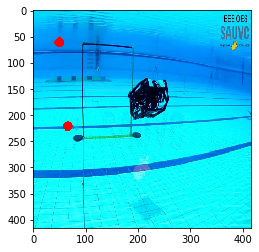

In [0]:
# After naive division
img = cv2.circle(img, (50, 61), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

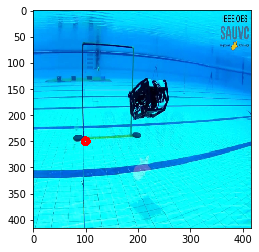

In [0]:
# Correct point
img = cv2.imread('/content/2018_VID_1_3_frame325.jpg')
img = cv2.resize(img, (416, 416))
img = cv2.circle(img, (100, 250), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

1 2 Case

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame854.jpg')
print(img.shape)

(720, 1280, 3)


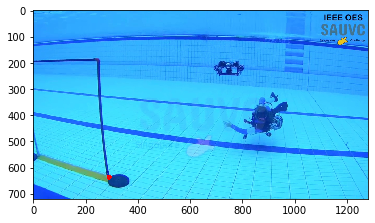

In [0]:
img = cv2.circle(img, (290, 636), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

Another 4 cord case

(720, 1280, 3)


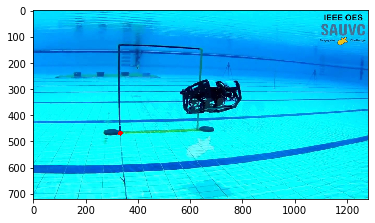

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame373.jpg')
print(img.shape)
img = cv2.circle(img, (333, 469), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

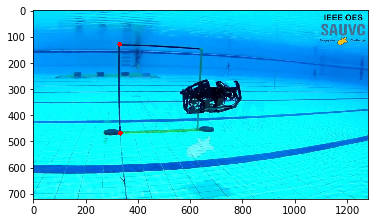

In [0]:
img = cv2.circle(img, (331, 130), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

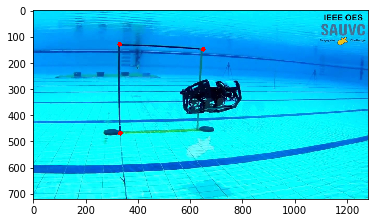

In [0]:
# 650 	149.714 	633.143 	454.857 	
img = cv2.circle(img, (650, 149), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

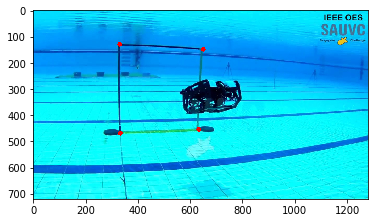

In [0]:
img = cv2.circle(img, (633, 454), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

Vauge Case

733.779 	716.998 	803.659 	39.890 	1220.526 	184.468 	1109.683 	704.950

(720, 1280, 3)


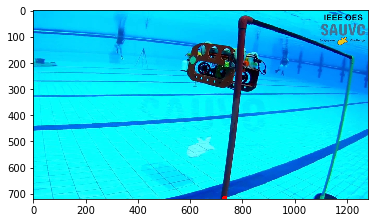

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame116.jpg')
print(img.shape)
img = cv2.circle(img, (733, 716), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

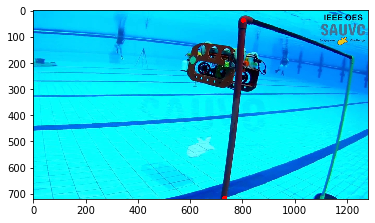

In [0]:
img = cv2.circle(img, (803, 39), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

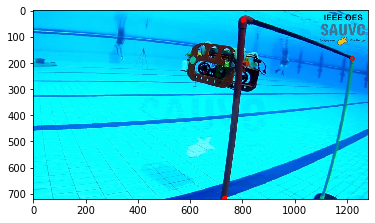

In [0]:
img = cv2.circle(img, (1220, 184), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

This is confirmed 1-2, 1-2 case checked from labelbox

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame867.jpg')
print(img.shape)

(720, 1280, 3)


In [0]:
for i in range(len(df)):
    if(df['External ID'][i] == '2018_VID_1_3_frame867.jpg'):
        print(df['x1'][i], df['y1'][i], df['x2'][i], df['y2'][i], df['x3'][i], df['y3'][i], df['x4'][i], df['y4'][i])


37.714 556.571 6.857 424.0 0.0 0.0 0.0 0.0


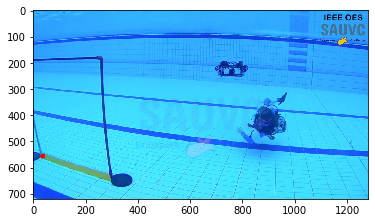

In [0]:
img = cv2.circle(img, (37, 556), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

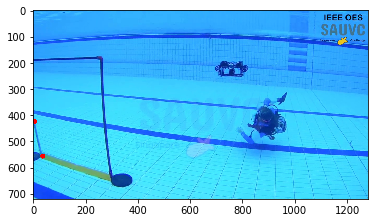

In [0]:
img = cv2.circle(img, (6, 424), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

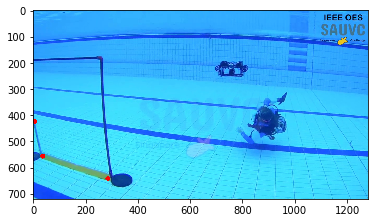

In [0]:
img = cv2.circle(img, (286, 642), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

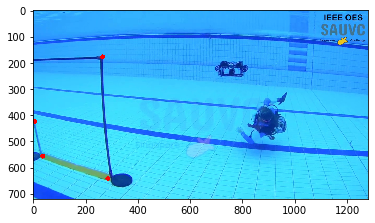

In [0]:
img = cv2.circle(img, (266, 178), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()